#### predicting oil production rate Qo 
by using different Ml algorithms like Linear regressor , SGDRegressor,RandomForestRegressor, MLPRegressor


In [39]:
#Import Libraries
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

importing the data 


In [40]:
data = pd.read_csv("D:\python\my work\machine-learning-oil-gas-industry-main\machine-learning-oil-gas-industry-main\Chapter07\Pandey_Ch07_Production_Engineering_Code\data\Well_Rates.csv")

In [41]:
data

,Qoil,Qwater,Qgas,BHP,WHP,WHT,Tsep,Psep,Choke_in
0,954.6,0.0,2.39,5410.33,3185.75,83.30,60.32,100.0,0.25
1,801.9,200.5,2.01,5388.00,3015.38,86.88,60.65,100.0,0.25
2,634.7,423.2,1.59,5391.13,2808.80,90.83,61.19,100.0,0.25
3,448.1,672.2,1.12,5405.72,2515.99,95.11,61.97,100.0,0.25
4,238.9,955.7,0.60,5433.80,2059.65,99.88,63.10,100.0,0.25
...,...,...,...,...,...,...,...,...,...
2095,4619.4,0.0,25.41,4385.64,1382.83,159.18,104.81,600.0,2.50
2096,3970.9,992.7,21.84,4256.74,1301.54,163.39,110.27,600.0,2.50
2097,3334.6,2223.0,18.34,4242.33,1237.25,168.78,117.95,600.0,2.50
2098,2543.1,3814.6,13.99,4289.75,1148.77,174.70,126.97,600.0,2.50


In [42]:
data.describe()

,Qoil,Qwater,Qgas,BHP,WHP,WHT,Tsep,Psep,Choke_in
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.00000,2100.000000
mean,2422.861810,1882.308714,9.493971,4716.083324,1918.292305,145.909257,97.696486,350.00000,1.023000
std,1541.001868,1862.011574,6.231652,435.269654,811.165237,29.409260,24.843953,170.82319,0.712687
min,210.400000,0.000000,0.600000,4074.680000,608.490000,74.990000,60.110000,100.00000,0.250000
25%,1104.700000,354.300000,4.150000,4315.790000,1194.920000,124.180000,72.450000,200.00000,0.420000
50%,2182.200000,1186.850000,8.220000,4615.805000,1766.865000,156.855000,101.800000,350.00000,0.800000
75%,3626.100000,2879.900000,13.935000,5135.580000,2611.970000,168.830000,118.010000,500.00000,1.500000
max,6411.300000,6639.000000,25.890000,5490.920000,3946.110000,182.790000,140.460000,600.00000,2.500000


In [43]:
# to find if there is nulls or not 
data.info

 

<bound method DataFrame.info of         Qoil  Qwater   Qgas      BHP      WHP     WHT    Tsep   Psep  Choke_in
0      954.6     0.0   2.39  5410.33  3185.75   83.30   60.32  100.0      0.25
1      801.9   200.5   2.01  5388.00  3015.38   86.88   60.65  100.0      0.25
2      634.7   423.2   1.59  5391.13  2808.80   90.83   61.19  100.0      0.25
3      448.1   672.2   1.12  5405.72  2515.99   95.11   61.97  100.0      0.25
4      238.9   955.7   0.60  5433.80  2059.65   99.88   63.10  100.0      0.25
...      ...     ...    ...      ...      ...     ...     ...    ...       ...
2095  4619.4     0.0  25.41  4385.64  1382.83  159.18  104.81  600.0      2.50
2096  3970.9   992.7  21.84  4256.74  1301.54  163.39  110.27  600.0      2.50
2097  3334.6  2223.0  18.34  4242.33  1237.25  168.78  117.95  600.0      2.50
2098  2543.1  3814.6  13.99  4289.75  1148.77  174.70  126.97  600.0      2.50
2099  1474.4  5897.6   8.11  4441.59  1000.72  180.56  136.61  600.0      2.50

[2100 rows x 9 colu

there is no nulls in the data
to show the relation between the features , we can use Correlation matrix 

<AxesSubplot:>

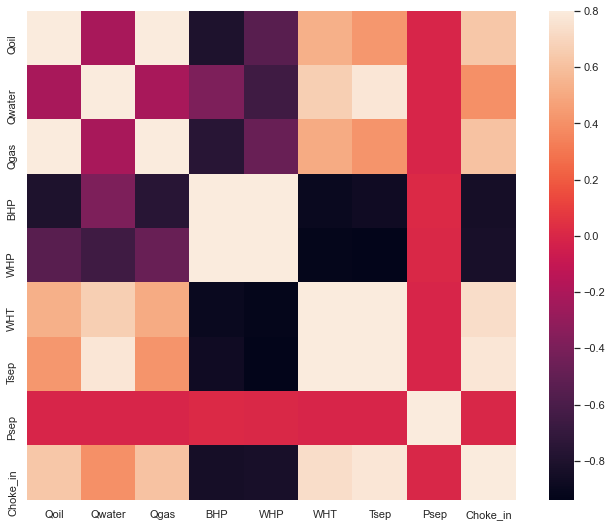

In [44]:
import seaborn as sns 

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

D:\python\New folder\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


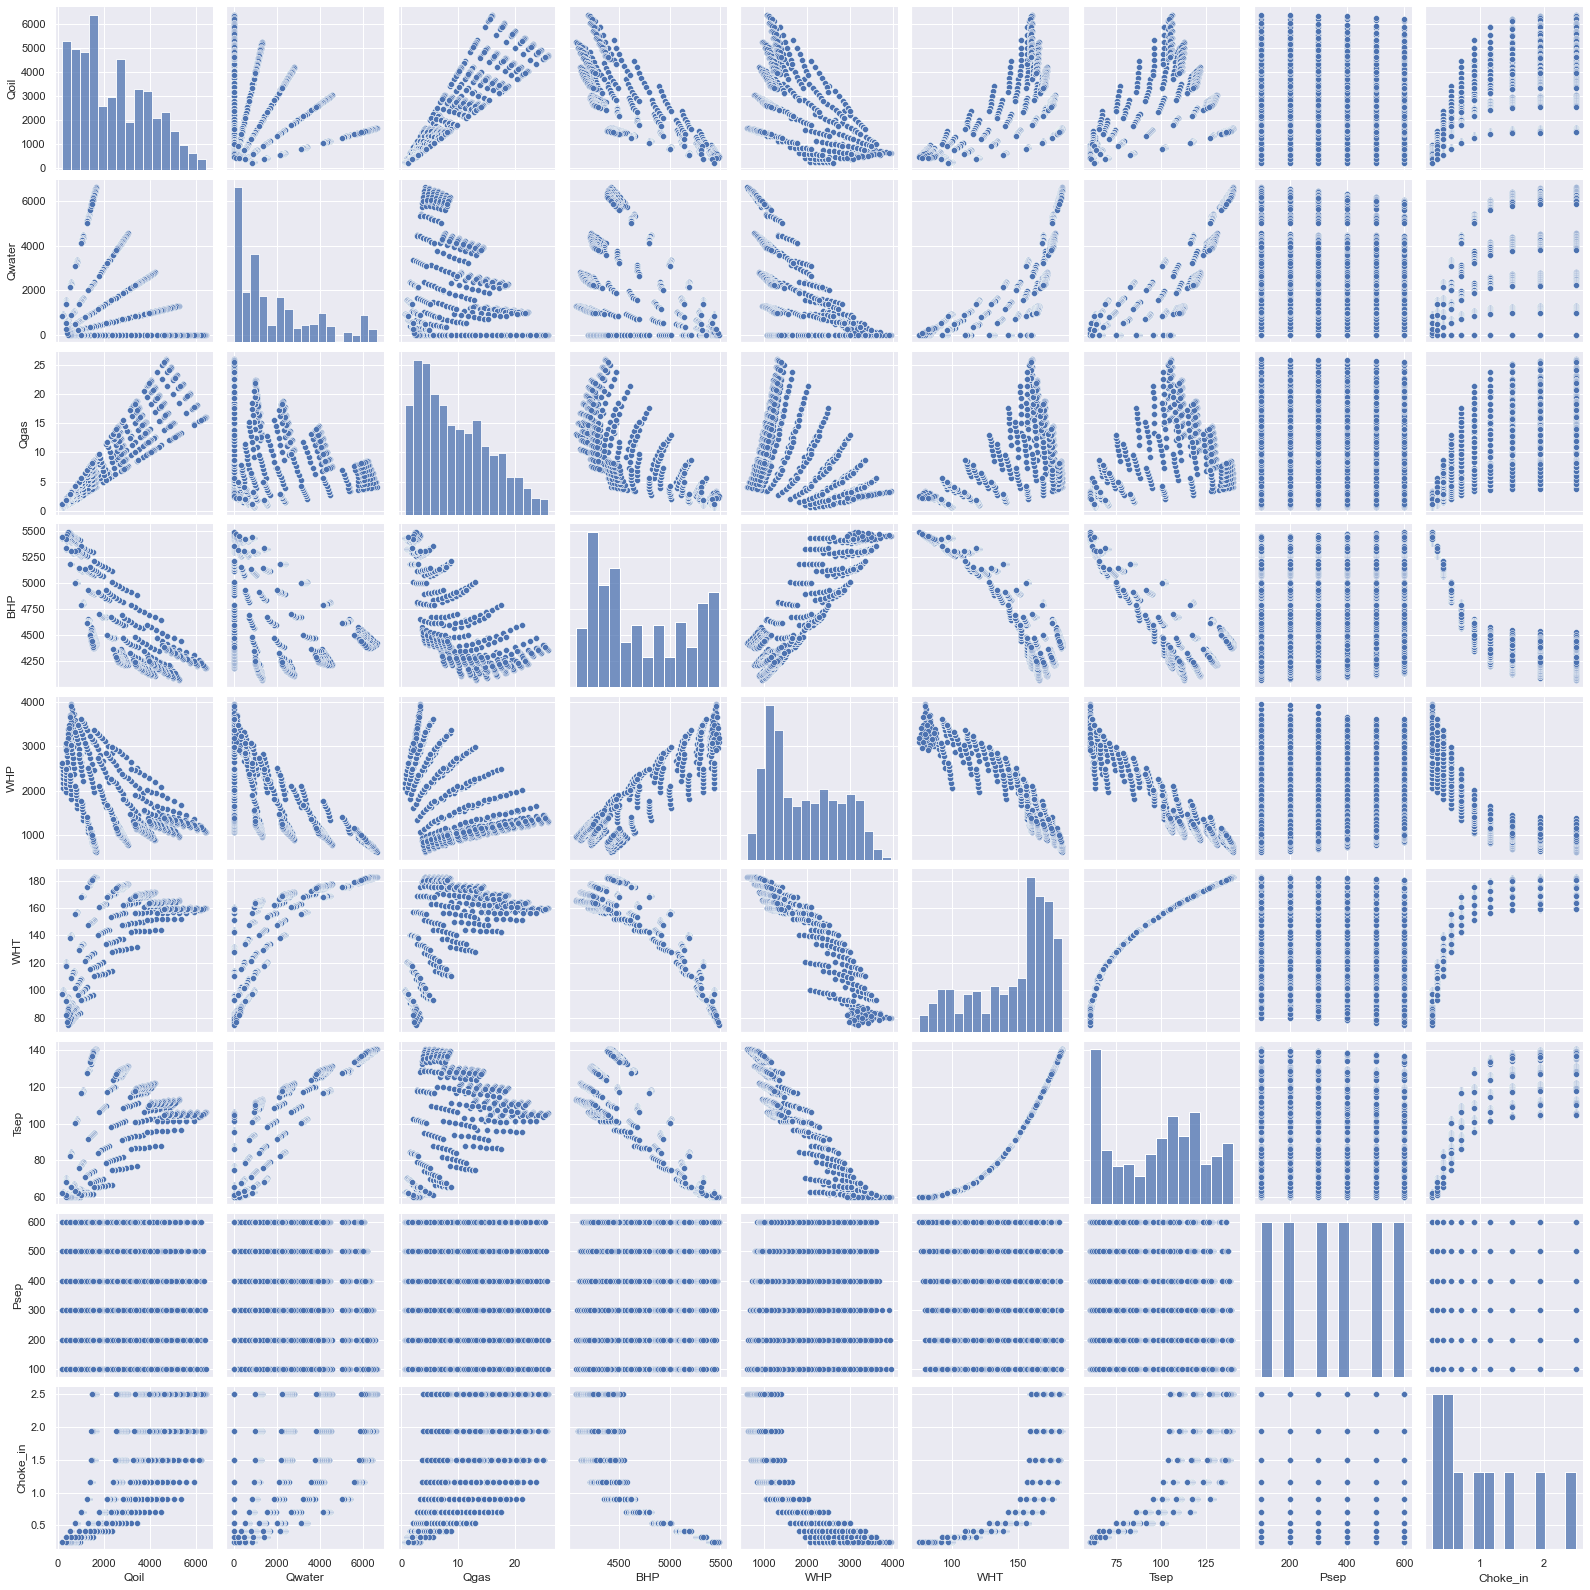

In [45]:
sns.set()
sns.pairplot(data, size = 2.5)
plt.show()

from the pair plot and corelation mtrix , you can find that there is no strong relation between p sep and other features so we can drop p sep columns 


In [46]:
data.columns

Index(['Qoil', 'Qwater', 'Qgas', 'BHP', 'WHP', 'WHT', 'Tsep', 'Psep',
       'Choke_in'],
      dtype='object')

In [47]:
data =data.drop(["Psep"],axis=1)


In [48]:
data

,Qoil,Qwater,Qgas,BHP,WHP,WHT,Tsep,Choke_in
0,954.6,0.0,2.39,5410.33,3185.75,83.30,60.32,0.25
1,801.9,200.5,2.01,5388.00,3015.38,86.88,60.65,0.25
2,634.7,423.2,1.59,5391.13,2808.80,90.83,61.19,0.25
3,448.1,672.2,1.12,5405.72,2515.99,95.11,61.97,0.25
4,238.9,955.7,0.60,5433.80,2059.65,99.88,63.10,0.25
...,...,...,...,...,...,...,...,...
2095,4619.4,0.0,25.41,4385.64,1382.83,159.18,104.81,2.50
2096,3970.9,992.7,21.84,4256.74,1301.54,163.39,110.27,2.50
2097,3334.6,2223.0,18.34,4242.33,1237.25,168.78,117.95,2.50
2098,2543.1,3814.6,13.99,4289.75,1148.77,174.70,126.97,2.50


to make Q oil is the result  

In [49]:
y=data.iloc[:,0]
y=y.values.reshape(-1,1)
#y.shape
y

array([[ 954.6],
       [ 801.9],
       [ 634.7],
       ...,
       [3334.6],
       [2543.1],
       [1474.4]])

In [50]:
X=data.iloc[:,1:]
#X.shape
X

,Qwater,Qgas,BHP,WHP,WHT,Tsep,Choke_in
0,0.0,2.39,5410.33,3185.75,83.30,60.32,0.25
1,200.5,2.01,5388.00,3015.38,86.88,60.65,0.25
2,423.2,1.59,5391.13,2808.80,90.83,61.19,0.25
3,672.2,1.12,5405.72,2515.99,95.11,61.97,0.25
4,955.7,0.60,5433.80,2059.65,99.88,63.10,0.25
...,...,...,...,...,...,...,...
2095,0.0,25.41,4385.64,1382.83,159.18,104.81,2.50
2096,992.7,21.84,4256.74,1301.54,163.39,110.27,2.50
2097,2223.0,18.34,4242.33,1237.25,168.78,117.95,2.50
2098,3814.6,13.99,4289.75,1148.77,174.70,126.97,2.50


In [53]:

#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])
print('y \n' , y[:10])


X 
 [[-1.01114143 -1.14025365  1.59536054  1.56288697 -2.12940311 -1.50480833
  -1.08488584]
 [-0.90343654 -1.2012472   1.54404679  1.35280575 -2.00764375 -1.49152226
  -1.08488584]
 [-0.78380622 -1.26866111  1.55123945  1.09807442 -1.87330032 -1.46978141
  -1.08488584]
 [-0.65004802 -1.3441005   1.58476689  0.7370139  -1.72773326 -1.43837796
  -1.08488584]
 [-0.49775706 -1.42756535  1.64929399  0.17430649 -1.56550082 -1.39288323
  -1.08488584]
 [-1.01114143 -1.14025365  1.59536054  1.56288697 -2.12940311 -1.50480833
  -1.08488584]
 [-0.90343654 -1.2012472   1.54404679  1.35280575 -2.00764375 -1.49152226
  -1.08488584]
 [-0.78380622 -1.26866111  1.55123945  1.09807442 -1.87330032 -1.46978141
  -1.08488584]
 [-0.65004802 -1.3441005   1.58476689  0.7370139  -1.72773326 -1.43837796
  -1.08488584]
 [-0.49775706 -1.42756535  1.64929399  0.17430649 -1.56550082 -1.39288323
  -1.08488584]]
y 
 [[954.6]
 [801.9]
 [634.7]
 [448.1]
 [238.9]
 [954.6]
 [801.9]
 [634.7]
 [448.1]
 [238.9]]


In [54]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [57]:
#Applying Linear Regression Model 

LinearRegressionModel= LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
#print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
#print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

score_LRM =LinearRegressionModel.score(X_test, y_test)


#print(score_LRM)
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
#print('Predicted Value for Linear Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LRM = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)


In [58]:
#Applying SGDRegressor Model 

'''
sklearn.linear_model.SGDRegressor(loss='squared_loss’, penalty=’l2’, alpha=0.0001,
                                  l1_ratio=0.15, fit_intercept=True, max_iter=None,
                                  tol=None, shuffle=True, verbose=0, epsilon=0.1,
                                  random_state=None, learning_rate='invscaling’,
                                  eta0=0.01, power_t=0.25, early_stopping=False,
                                  validation_fraction=0.1, n_iter_no_change=5,
                                  warm_start=False, average=False, n_iter=None)
'''

SGDRegressionModel = SGDRegressor(alpha=.1,random_state=33,penalty='l1')
SGDRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('SGD Regression Train Score is : ' , SGDRegressionModel.score(X_train, y_train))
#print('SGD Regression Test Score is : ' , SGDRegressionModel.score(X_test, y_test))
#print('SGD Regression Coef is : ' , SGDRegressionModel.coef_)
#print('SGD Regression intercept is : ' , SGDRegressionModel.intercept_)
#print('----------------------------------------------------')

score_SGD=SGDRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = SGDRegressionModel.predict(X_test)
#print('Predicted Value for SGD Regression is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SGD = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)

D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
#Applying Lasso Regression Model 

'''
sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=
                           False, copy_X=True, max_iter=1000, tol=0.0001,
                           warm_start=False, positive=False, random_state=None,selection='cyclic')
'''

LassoRegressionModel = Lasso(alpha=.001,random_state=33,normalize=True)
LassoRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Lasso Regression Train Score is : ' , LassoRegressionModel.score(X_train, y_train))
#print('Lasso Regression Test Score is : ' , LassoRegressionModel.score(X_test, y_test))
#print('Lasso Regression Coef is : ' , LassoRegressionModel.coef_)
#print('Lasso Regression intercept is : ' , LassoRegressionModel.intercept_)
#print('----------------------------------------------------')
score_LAS=LassoRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = LassoRegressionModel.predict(X_test)
#print('Predicted Value for Lasso Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LAS = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LAS)

In [60]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''

RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
#print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
#print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)

<ipython-input-60-4eb458068b96>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressorModel.fit(X_train, y_train)


In [61]:
#Applying SVR Model 

'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 100.000 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
#print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
#print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

score_SVR= SVRModel.score(X_test, y_test)

#Calculating Prediction
y_pred = SVRModel.predict(X_test)
#print('Predicted Value for SVRModel is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SVR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_SVR)

D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [62]:
#Applying MLPRegressor Model 

'''
sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                    alpha=0.0001,batch_size='auto’, learning_rate=’constant’,
                                    learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                    random_state=None,tol=0.0001, verbose=False, warm_start=False,
                                    momentum=0.9, nesterovs_momentum=True,early_stopping=False,
                                    validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,
                                    n_iter_no_change=10)
'''

MLPRegressorModel = MLPRegressor(activation='identity', # can be also identity , logistic , relu,tanh
                                 solver='lbfgs',  # can be also sgd , adam,lbfgs
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=10 ,hidden_layer_sizes=(100, 3),random_state=33,max_iter=1000)
MLPRegressorModel.fit(X_train, y_train)
#Calculating Details

#print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
#print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
#print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)
#print('----------------------------------------------------')
score_MLP=MLPRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = MLPRegressorModel.predict(X_test)
#print('Predicted Value for MLPRegressorModel is : ' , y_pred[:10])
#Calculating Mean Absolute Error
MAEValue_MLP = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
#print('Mean Absolute Error Value is : ', MAEValue_MLP)



D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressorModel Test Score is :  0.9784999443935933
MLPRegressorModel No. of iterations is :  760
MLPRegressorModel No. of layers is :  4


In [120]:
models = pd.DataFrame({
'Model': ['Linear Regression Model ', 'SGD Model ', 'Lassio Model',
'Random Forest Regressor ', 'Linear SVR',
'MLP Model '],
'Score': [score_LRM, score_SGD, score_LAS,
score_RFR, score_SVR, score_MLP],
'Mean Absolute Error Value':[MAEValue_LRM,MAEValue_SGD,MAEValue_LAS,MAEValue_RFR,MAEValue_SVR,MAEValue_MLP]})
models.sort_values(by='Score', ascending=False)

models.set_index(["Model"], inplace = True, 
append = False, drop = True) 
models

,Score,Mean Absolute Error Value
Model,,
Linear Regression Model,0.978500,185.252025
SGD Model,0.977672,188.030497
Lassio Model,0.978508,185.219002
Random Forest Regressor,0.999595,14.400933
Linear SVR,0.992640,83.010670
MLP Model,0.978500,185.257439


from the above table , we can find that the best results come from Random Forest Regressor  

In [ ]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''

RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
#print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)


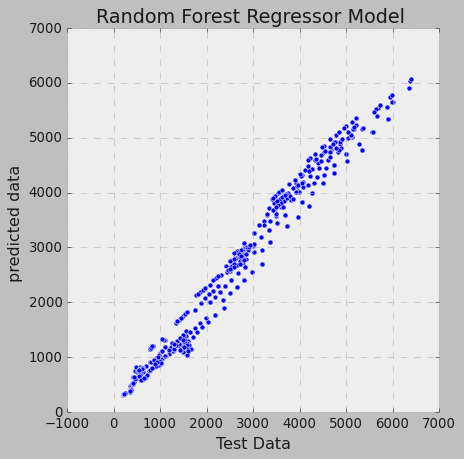

In [115]:
plt.style.use('bmh')
#plt.style.use('classic')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(y_test,y_pred,c="blue", label="All - Filtered")
ax.set(xlabel="Test Data", ylabel="Predicted Data ", title="Random Forest Regressor Model ")
plt.show()
